In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

**Table of contents**<a id='toc0_'></a>    
- [System Sensors](#toc1_)    
  - [Load (hourly)](#toc1_1_)    
- [Outdoor Sensors](#toc2_)    
  - [local weather hourly](#toc2_1_)    
- [Indoor Sensors](#toc3_)    
  - [Zone Temp](#toc3_1_)    
  - [Slab Temp](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[System Sensors](#toc0_)
## <a id='toc1_1_'></a>[Load (hourly)](#toc0_)

In [3]:
load_y1 = pd.read_csv('./System Sensors/Year 1 (Jun 2022 - May 2023)/Load_hourly/48190963_Loads_hourly.csv')
load_y2 = pd.read_csv('./System Sensors/Year 2 (Jun 2023 - May 2024)/Load_hourly/48190948_Loads_hourly.csv')
load_data = pd.concat([load_y1, load_y2], axis=0, ignore_index=True)
load_data = load_data.sort_values(by='Timestamp').reset_index(drop=True)
print(load_data.shape)
print(load_data.isna().sum())
load_data.head()

(17544, 26)
Timestamp                       0
Plug_Basement                   0
Cooling                         0
Exhaust fan                     0
EHW                             0
Sumppump                        0
Emergency light load            0
EL                              0
Fire alarm                      0
Heat pump electric              0
Heating                         0
IT                              0
Lighting                        0
Plug1                           0
Plug2                           0
Plug3                           0
PV_meter1_load (kW)             0
PV_meter2_load (kW)             0
Battery cabinet                 0
SHW                          8784
Solar rapid shutdown            0
Control                         0
NET                             0
IN                              0
OUT                             0
Solar_hot_water_load (kW)    8760
dtype: int64


,Timestamp,Plug_Basement,Cooling,Exhaust fan,EHW,Sumppump,Emergency light load,EL,Fire alarm,Heat pump electric,...,PV_meter1_load (kW),PV_meter2_load (kW),Battery cabinet,SHW,Solar rapid shutdown,Control,NET,IN,OUT,Solar_hot_water_load (kW)
0,2022-06-01 00:00:00-04:00,0.190117,0.002001,0.003973,0.0,0.001130,0.030370,0.109032,0.065145,0.0,...,-0.050127,-0.048380,0.003126,0.001044,0.003929,0.200769,1.422260,1.422260,0.0,NaN
1,2022-06-01 01:00:00-04:00,0.198712,0.002010,0.003989,0.0,0.001148,0.030482,0.109224,0.065428,0.0,...,-0.049362,-0.050536,0.003116,0.001162,0.004033,0.201539,1.438863,1.438863,0.0,NaN
2,2022-06-01 02:00:00-04:00,0.163461,0.001990,0.003988,0.0,0.001133,0.030422,0.109083,0.065517,0.0,...,-0.048622,-0.047862,0.003119,0.001154,0.004018,0.203426,1.401933,1.401933,0.0,NaN
3,2022-06-01 03:00:00-04:00,0.173353,0.002003,0.003970,0.0,0.001137,0.030350,0.108715,0.064750,0.0,...,-0.048963,-0.050321,0.003120,0.000599,0.003993,0.199362,1.410452,1.410452,0.0,NaN
4,2022-06-01 04:00:00-04:00,0.197125,0.001997,0.003942,0.0,0.001126,0.030064,0.108166,0.064047,0.0,...,-0.048785,-0.049283,0.003112,0.000231,0.003896,0.198860,1.426215,1.426215,0.0,NaN


In [4]:
load_data.describe()

,Plug_Basement,Cooling,Exhaust fan,EHW,Sumppump,Emergency light load,EL,Fire alarm,Heat pump electric,Heating,...,PV_meter1_load (kW),PV_meter2_load (kW),Battery cabinet,SHW,Solar rapid shutdown,Control,NET,IN,OUT,Solar_hot_water_load (kW)
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,1.754400e+04,17544.000000,...,17544.000000,17544.000000,17544.000000,8760.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,8784.000000
mean,0.104442,0.031390,0.003958,0.031610,0.001114,0.045688,0.035990,0.066001,9.518924e-12,0.301354,...,0.919148,0.722198,0.003056,0.004548,0.004049,0.154542,-0.120588,1.010701,-1.131280,0.003643
std,0.062800,0.069580,0.000109,0.092589,0.000036,0.007464,0.050642,0.002586,1.260817e-09,0.381933,...,1.484404,1.294830,0.000102,0.012399,0.000123,0.025550,2.733333,0.787277,2.146102,0.011753
min,0.030904,0.000000,0.003564,-0.000011,0.000956,0.000000,0.000000,0.059401,0.000000e+00,0.000000,...,-0.106541,-0.095593,0.002811,0.000000,0.003653,0.123873,-10.087262,0.000000,-10.087262,0.000000
25%,0.079538,0.000000,0.003877,0.000000,0.001092,0.046789,0.000000,0.064496,0.000000e+00,0.000000,...,0.000000,0.000000,0.003091,0.000000,0.003966,0.131964,-1.211924,0.038734,-1.258855,0.000000
50%,0.093071,0.000000,0.003956,0.000000,0.001114,0.047872,0.000000,0.065567,0.000000e+00,0.032152,...,0.000000,0.000000,0.003103,0.000113,0.004039,0.148887,1.114685,1.115745,0.000000,0.000000
75%,0.111961,0.001972,0.004038,0.000000,0.001138,0.048762,0.105162,0.067130,0.000000e+00,0.677253,...,1.486043,1.059496,0.003111,0.000975,0.004119,0.164956,1.721193,1.721651,0.000000,0.000000
max,1.095967,0.202686,0.004299,1.600796,0.001234,0.092243,0.123930,0.087855,1.670000e-07,2.082851,...,8.445168,5.711190,0.003164,0.054776,0.004709,0.215571,3.440907,3.440907,0.000000,0.052082


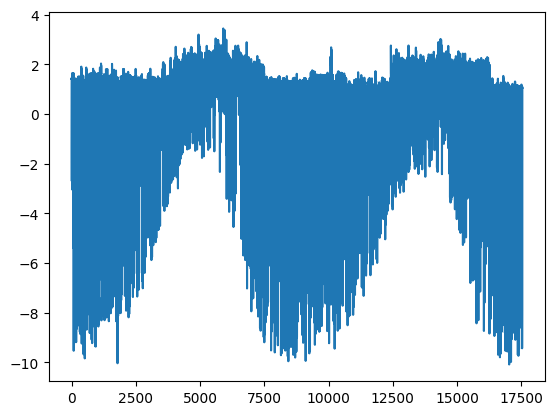

In [5]:
plt.plot(load_data.NET)

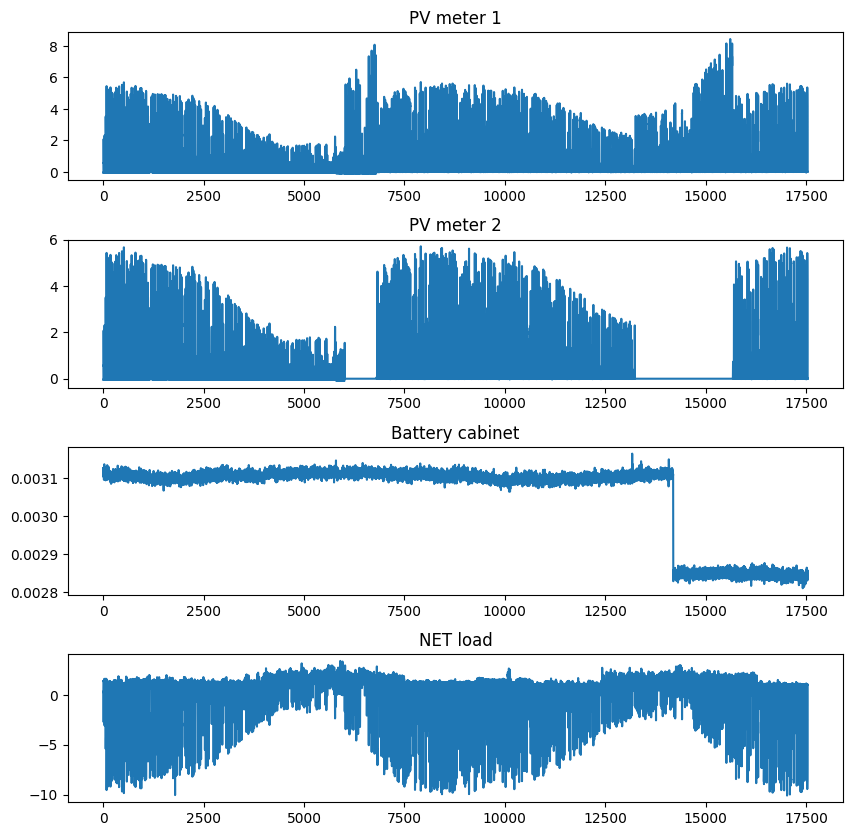

In [ ]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axes[0].plot(load_data["PV_meter1_load (kW)"])
axes[0].set_title('PV meter 1')

axes[1].plot(load_data["PV_meter2_load (kW)"])
axes[1].set_title('PV meter 2')

axes[2].plot(load_data["Battery cabinet"])
axes[2].set_title('Battery cabinet')

axes[3].plot(load_data.NET)
axes[3].set_title("NET load")

plt.savefig('./system_sensors.png')

### Battery Cabinet

<Axes: >

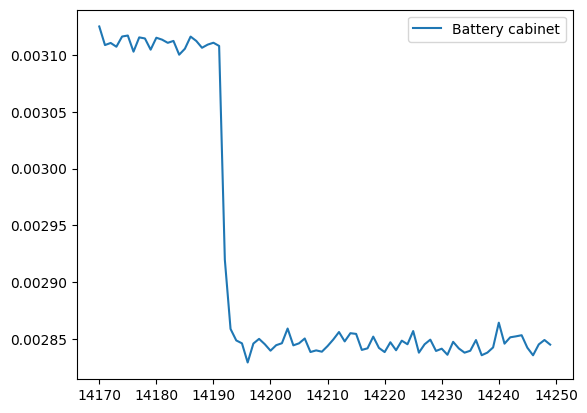

In [66]:
load_data[["Timestamp", "Battery cabinet"]].iloc[14170: 14250].plot()

In [67]:
load_data[["Timestamp", "Battery cabinet"]].iloc[14170: 14250]

,Timestamp,Battery cabinet
14170,2024-01-12 09:00:00-05:00,0.003125
14171,2024-01-12 10:00:00-05:00,0.003109
14172,2024-01-12 11:00:00-05:00,0.003110
14173,2024-01-12 12:00:00-05:00,0.003107
14174,2024-01-12 13:00:00-05:00,0.003116
...,...,...
14245,2024-01-15 12:00:00-05:00,0.002842
14246,2024-01-15 13:00:00-05:00,0.002836
14247,2024-01-15 14:00:00-05:00,0.002845
14248,2024-01-15 15:00:00-05:00,0.002849


In [68]:
weather_data.iloc[14170: 14250]

,Time,"Air temperature (gund, ¡É)","Relative humidity (gund, %)","Wind speed (gund, m/s)","Weather data, Wind speed (m/s)","Wind direction (gund, ¡Æ)","Weather data, Wind direction","Weather data, Rain","Solar radiation (gund, W/m^2)"
14170,2024-01-12 09:00:00-05:00,6.626667,62.866667,4.083333,1.530000,259.833333,314.525278,1,296.500000
14171,2024-01-12 10:00:00-05:00,7.560000,54.591667,3.916667,1.673889,273.916667,39.646667,1,381.500000
14172,2024-01-12 11:00:00-05:00,9.083333,50.766667,2.708333,0.655000,244.666667,122.473704,1,430.500000
14173,2024-01-12 12:00:00-05:00,9.840833,48.425000,3.041667,1.094167,174.583333,281.627143,1,411.333333
14174,2024-01-12 13:00:00-05:00,10.395000,46.083333,1.750000,0.690000,183.250000,292.483333,1,311.000000
...,...,...,...,...,...,...,...,...,...
14245,2024-01-15 12:00:00-05:00,0.402727,38.783333,4.541667,2.660278,206.166667,284.216667,1,349.250000
14246,2024-01-15 13:00:00-05:00,0.681250,38.450000,4.125000,2.781389,202.083333,282.405556,1,300.333333
14247,2024-01-15 14:00:00-05:00,0.625455,37.333333,3.791667,2.269167,198.083333,287.003333,1,197.333333
14248,2024-01-15 15:00:00-05:00,0.430000,38.225000,3.375000,1.731667,171.833333,285.094444,1,88.083333


## Window opening

In [58]:
window_y1 = pd.read_csv('./System Sensors/Year 1 (Jun 2022 - May 2023)/Window_opening_hourly/48190960_Window_Opening.csv')
window_y2 = pd.read_csv('./System Sensors/Year 2 (Jun 2023 - May 2024)/Window_opening_hourly/48190945_Window_Opening.csv')
window_data = pd.concat([window_y1, window_y2], axis=0, ignore_index=True)
window_data = window_data.sort_values(by='Timestamp').reset_index(drop=True)
print(window_data.shape)
print(window_data.isna().sum())
window_data.head()

(17544, 35)
Timestamp                        0
Z11_E_opening (%)                0
Z11_S_opening (%)                0
Z12_S_opening (%)                0
Z13_S_opening (%)                0
Z13_W_opening (%)                0
Z15_N_opening (%)                0
Z15_W_opening (%)                0
Z16_N_opening (%)                0
Z17_N_opening (%)                0
Z1_Solar_damper_opening (%)      0
Z1_S_opening (%)                 0
Z21_E_opening (%)                0
Z21_Sky_opening (%)              0
Z21_S_opening (%)                0
Z22_S_opening (%)                0
Z23_Sky_opening (%)              0
Z23_S_opening (%)                0
Z23_W_opening (%)                0
Z24_opening (%)                  0
Z24_Sky_opening (%)              0
Z25_N_opening (%)                0
Z25_Sky_opening (%)              0
Z25_W_opening (%)                0
Z26_N_opening (%)                0
Z27_N_opening (%)                0
Z27_Sky_opening (%)              0
Z31_Sky_opening (%)              0
Z31_S_op

,Timestamp,Z11_E_opening (%),Z11_S_opening (%),Z12_S_opening (%),Z13_S_opening (%),Z13_W_opening (%),Z15_N_opening (%),Z15_W_opening (%),Z16_N_opening (%),Z17_N_opening (%),...,Z27_N_opening (%),Z27_Sky_opening (%),Z31_Sky_opening (%),Z31_S_opening (%),Z32_W_opening (%),Z33_N_opening (%),Z33_Sky_opening (%),Z3_N_opening (%),Z4_N_opening (%),Z5_N_opening (%)
0,2022-06-01 00:00:00-04:00,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,15.966667,...,81.666667,1.066667,0.0,0.0,31.833333,31.800000,1.783333,80.583333,21.516667,15.983333
1,2022-06-01 01:00:00-04:00,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,18.183333,...,85.366667,5.766667,0.0,0.0,39.750000,39.366667,9.300000,81.800000,34.133333,18.483333
2,2022-06-01 02:00:00-04:00,20.150000,20.083333,19.716667,19.516667,19.6,19.733333,19.733333,19.733333,3.316667,...,17.550000,1.666667,0.0,0.0,71.233333,69.950000,42.466667,16.066667,5.900000,2.966667
3,2022-06-01 03:00:00-04:00,0.033333,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,94.000000,61.800000,53.550000,0.000000,0.000000,0.000000
4,2022-06-01 04:00:00-04:00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,94.000000,8.750000,8.800000,0.000000,0.000000,0.000000


## Zone Valve

In [19]:
valve_y1 = pd.read_csv('./System Sensors/Year 1 (Jun 2022 - May 2023)/Zone_valve_hourly/48190957_Zone_Valve.csv')
valve_y2 = pd.read_csv('./System Sensors/Year 2 (Jun 2023 - May 2024)/Zone_valve_hourly/48190942_Zone_Valve.csv')
valve_data = pd.concat([valve_y1, valve_y2], axis=0, ignore_index=True)
valve_data = valve_data.sort_values(by='Timestamp').reset_index(drop=True)
print(valve_data.shape)
print(valve_data.isna().sum())
valve_data.head()

(17544, 20)
Timestamp            0
Z11_valve (%)       34
Z12_valve (%)       34
Z13_valve (%)       34
Z14_valve (%)       34
Z15_valve (%)       34
Z16+17_valve (%)    34
Z1_valve (%)        34
Z21_valve (%)       34
Z22_valve (%)       34
Z23_valve (%)       34
Z24_valve (%)       34
Z25_valve (%)       34
Z26_valve (%)       34
Z27_valve (%)       34
Z2_valve (%)        34
Z3+4+5_valve (%)    34
Z31_valve (%)       34
Z32_valve (%)       34
Z33_valve (%)       34
dtype: int64


,Timestamp,Z11_valve (%),Z12_valve (%),Z13_valve (%),Z14_valve (%),Z15_valve (%),Z16+17_valve (%),Z1_valve (%),Z21_valve (%),Z22_valve (%),Z23_valve (%),Z24_valve (%),Z25_valve (%),Z26_valve (%),Z27_valve (%),Z2_valve (%),Z3+4+5_valve (%),Z31_valve (%),Z32_valve (%),Z33_valve (%)
0,2022-06-01 00:00:00-04:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
1,2022-06-01 01:00:00-04:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
2,2022-06-01 02:00:00-04:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
3,2022-06-01 03:00:00-04:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
4,2022-06-01 04:00:00-04:00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0


# <a id='toc2_'></a>[Outdoor Sensors](#toc0_)
## <a id='toc2_1_'></a>[local weather hourly](#toc0_)

In [7]:
weather_data_y1 = pd.read_csv('./Outdoor Sensors/Year 1 (Jun 2022 - May 2023)/Local_weather_hourly/48190936_Weather.csv', encoding='unicode_escape')
weather_data_y2 = pd.read_csv('./Outdoor Sensors/Year 2 (Jun 2023 - May 2024)/Local_weather_hourly/48190930_Weather.csv', encoding='unicode_escape')
weather_data = pd.concat([weather_data_y1, weather_data_y2], axis=0, ignore_index=True)
weather_data = weather_data.sort_values(by='Time').reset_index(drop=True)
print(weather_data.shape)
print(weather_data.isna().sum())
weather_data.head()

(17544, 9)
Time                              0
Air temperature (gund, ¡É)        0
Relative humidity (gund, %)       0
Wind speed (gund, m/s)            0
Weather data, Wind speed (m/s)    0
Wind direction (gund, ¡Æ)         0
Weather data, Wind direction      0
Weather data, Rain                0
Solar radiation (gund, W/m^2)     0
dtype: int64


,Time,"Air temperature (gund, ¡É)","Relative humidity (gund, %)","Wind speed (gund, m/s)","Weather data, Wind speed (m/s)","Wind direction (gund, ¡Æ)","Weather data, Wind direction","Weather data, Rain","Solar radiation (gund, W/m^2)"
0,2022-06-01 00:00:00-04:00,12.576667,88.250000,0.208333,0.033333,98.583333,129.857023,0,1.0
1,2022-06-01 01:00:00-04:00,12.975833,89.908333,0.000000,0.033333,111.083333,129.857023,0,1.0
2,2022-06-01 02:00:00-04:00,13.330833,90.491667,0.000000,0.033333,98.333333,129.857023,0,1.0
3,2022-06-01 03:00:00-04:00,13.648333,87.258333,0.250000,0.050000,84.166667,109.500000,0,1.0
4,2022-06-01 04:00:00-04:00,13.836667,80.758333,0.166667,0.050000,85.833333,119.250157,0,1.0


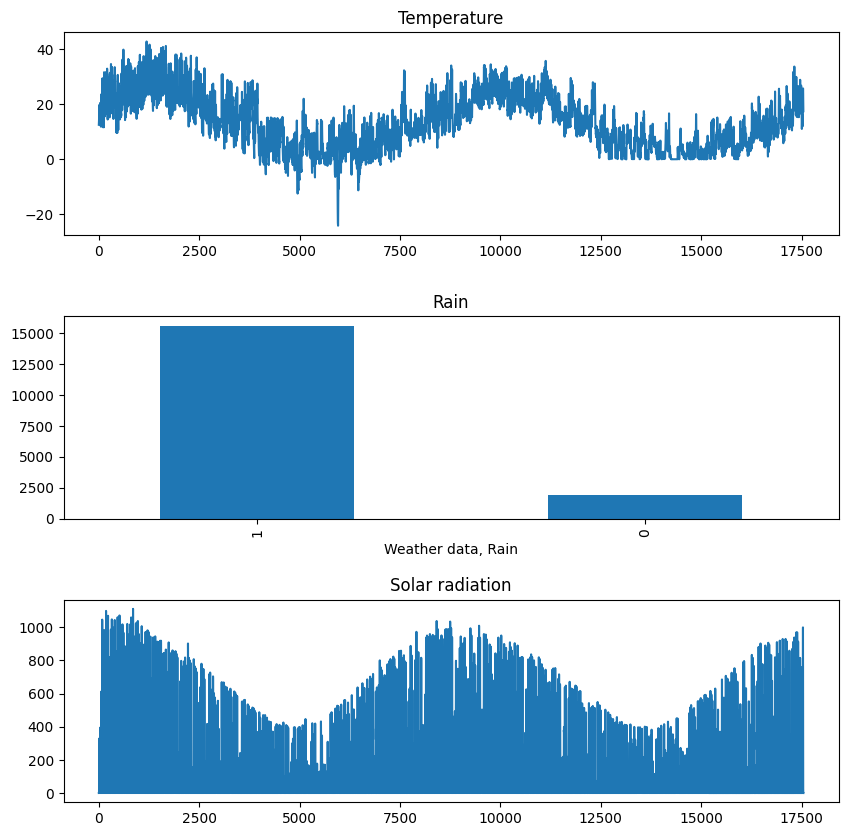

In [8]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

axes[0].plot(weather_data["Air temperature (gund, ¡É)"])
axes[0].set_title('Temperature')

weather_data["Weather data, Rain"].value_counts().plot(kind="bar", ax=axes[1])
axes[1].set_title('Rain')

axes[2].plot(weather_data["Solar radiation (gund, W/m^2)"])
axes[2].set_title('Solar radiation')

plt.savefig('./weather.png')

In [9]:
weather_data.describe()

,"Air temperature (gund, ¡É)","Relative humidity (gund, %)","Wind speed (gund, m/s)","Weather data, Wind speed (m/s)","Wind direction (gund, ¡Æ)","Weather data, Wind direction","Weather data, Rain","Solar radiation (gund, W/m^2)"
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,12.990634,69.346530,1.612589,1.320503,194.498215,205.875410,0.891416,151.316257
std,9.543000,20.424801,1.574384,1.074082,86.399663,105.157975,0.311126,234.452574
min,-24.125000,16.516667,0.000000,0.000000,0.000000,0.124811,0.000000,0.620000
25%,5.094375,53.375000,0.458333,0.388958,132.062500,112.079118,1.000000,1.000000
50%,12.257083,70.825000,1.250000,1.138235,211.041667,257.416043,1.000000,5.833333
75%,20.288958,87.077083,2.306667,2.014306,266.530833,291.194444,1.000000,235.317083
max,42.846667,100.000000,16.775000,6.863833,355.000000,359.652274,1.000000,1109.916667


In [ ]:
facade_data_y1 = pd.read_csv('./Outdoor Sensors/Year 1 (Jun 2022 - May 2023)/Facade_temp_hourly/48190939_Facade_temp_hourly.csv', encoding='unicode_escape')
facade_data_y2 = pd.read_csv('./Outdoor Sensors/Year 2 (Jun 2023 - May 2024)/Facade_temp_hourly/48190933_Facade_temp_hourly.csv', encoding='unicode_escape')
facade_data = pd.concat([facade_data_y1, facade_data_y2], axis=0, ignore_index=True)
facade_data = facade_data.sort_values(by='Timestamp').reset_index(drop=True)
print(facade_data.shape)
print(facade_data.isna().sum())
facade_data.head()

(17544, 10)
Timestamp                          0
East_facade_high_temp          12891
East_facade_low_temp             189
North_facade_high_temp           182
North_facade_low_temp            182
South_facade_high_temp           189
South_facade_low_temp            337
South_facade_mid_temp            751
West_facade_high_left_temp       182
West_facade_high_right_temp      182
dtype: int64


,Timestamp,East_facade_high_temp,East_facade_low_temp,North_facade_high_temp,North_facade_low_temp,South_facade_high_temp,South_facade_low_temp,South_facade_mid_temp,West_facade_high_left_temp,West_facade_high_right_temp
0,2022-06-01 00:00:00-04:00,56.273857,57.417967,57.708367,57.019656,59.447463,58.172017,58.348897,58.093806,56.613096
1,2022-06-01 01:00:00-04:00,56.489347,57.362527,58.496406,57.137136,59.507193,58.028137,58.088857,57.882607,56.563268
2,2022-06-01 02:00:00-04:00,56.604847,57.517957,57.346687,57.145716,58.557126,58.187197,58.064767,58.190497,56.666227
3,2022-06-01 03:00:00-04:00,56.675797,57.477366,57.177728,57.124926,57.898116,58.305997,57.823867,57.841687,56.757308
4,2022-06-01 04:00:00-04:00,57.090608,57.851257,57.646987,57.624546,58.268047,58.503667,58.208647,58.071037,57.112386


# <a id='toc3_'></a>[Indoor Sensors](#toc0_)
## <a id='toc3_1_'></a>[Zone Temp](#toc0_)

In [11]:
zone_data_y1 = pd.read_csv('./Indoor Sensors/Year 1 (Jun 2022 - May 2023)/Zone_temp_hourly/48190918_Zone_temp_hourly.csv', encoding='unicode_escape')
zone_data_y2 = pd.read_csv('./Indoor Sensors/Year 2 (Jun 2023 - May 2024)/Zone_temp_hourly/48190906_Zone_temp_hourly.csv', encoding='unicode_escape')
zone_data = pd.concat([zone_data_y1, zone_data_y2], axis=0, ignore_index=True)
zone_data = zone_data.sort_values(by='Timestamp').reset_index(drop=True)
print(zone_data.shape)
print(zone_data.isna().sum())
zone_data.head()

(17544, 18)
Timestamp           0
Z11_temp          927
Z12+13_temp       927
Z14_temp          927
Z15+16_temp       927
Z17_temp          923
Z1_temp           923
Z21_temp          193
Z22+23_temp       193
Z24_temp          197
Z25+26+27_temp    197
Z2_temp           944
Z31_temp          187
Z32_temp          187
Z33_temp          187
Z3_temp           923
Z4_temp           923
Z5_temp           927
dtype: int64


,Timestamp,Z11_temp,Z12+13_temp,Z14_temp,Z15+16_temp,Z17_temp,Z1_temp,Z21_temp,Z22+23_temp,Z24_temp,Z25+26+27_temp,Z2_temp,Z31_temp,Z32_temp,Z33_temp,Z3_temp,Z4_temp,Z5_temp
0,2022-06-01 00:00:00-04:00,21.732333,21.228000,19.698000,21.105000,20.461500,20.808167,22.226833,22.016000,21.988000,22.015333,25.128834,24.859500,23.883333,23.591667,21.129000,21.062500,20.364167
1,2022-06-01 01:00:00-04:00,21.666667,20.980333,19.491667,20.870000,20.100333,20.576667,22.226000,21.847667,21.984000,22.086333,24.793333,24.791333,23.783667,23.636000,21.085000,20.319333,20.014333
2,2022-06-01 02:00:00-04:00,22.026667,21.704667,19.864667,21.540666,20.733833,21.135167,22.275333,21.674333,21.990000,21.859333,24.735000,24.674000,23.658000,23.555333,21.776333,21.443500,20.609833
3,2022-06-01 03:00:00-04:00,22.383333,22.360333,20.620333,22.169333,21.426000,22.633333,22.195000,21.451667,21.547667,21.270000,25.069333,24.522000,23.490333,23.093667,22.093000,22.416000,20.844000
4,2022-06-01 04:00:00-04:00,22.533333,22.599000,20.921333,22.443000,21.736333,23.063000,22.294667,21.731000,21.533667,21.441333,25.288667,24.534000,23.640333,23.442667,22.227667,22.747000,20.987333


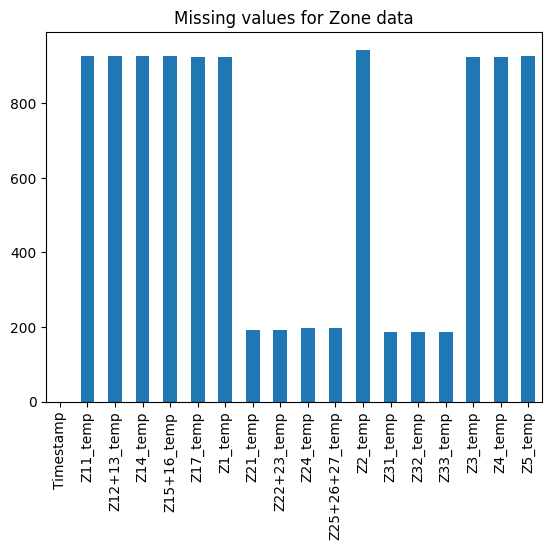

In [ ]:
zone_data.isna().sum().plot(kind="bar", title="Missing values for Zone data")
plt.savefig('./missing_zone_data.png')

## <a id='toc3_2_'></a>[Slab Temp](#toc0_)

In [15]:
slab_data_y1 = pd.read_csv('./Indoor Sensors/Year 1 (Jun 2022 - May 2023)/Slab_temp_hourly/48190921_Slab_temp_hourly.csv', encoding='unicode_escape')
slab_data_y2 = pd.read_csv('./Indoor Sensors/Year 2 (Jun 2023 - May 2024)/Slab_temp_hourly/48190909_Slab_temp_hourly.csv', encoding='unicode_escape')
slab_data = pd.concat([slab_data_y1, slab_data_y2], axis=0, ignore_index=True)
slab_data = slab_data.sort_values(by='Timestamp').reset_index(drop=True)
print(slab_data.shape)
print(slab_data.isna().sum())
slab_data.head()

(17544, 21)
Timestamp       0
Z11_temp      318
Z12_temp      748
Z13_temp      209
Z14_temp      253
Z15_temp      264
Z16_temp      284
Z17_temp      399
Z1_temp       159
Z21_temp      190
Z22_temp      188
Z23_temp      228
Z24_temp      185
Z25_temp      159
Z26_temp      186
Z27_temp      188
Z2_temp       159
Z31_temp      407
Z32_temp      232
Z33_temp      159
Z4_temp      1575
dtype: int64


,Timestamp,Z11_temp,Z12_temp,Z13_temp,Z14_temp,Z15_temp,Z16_temp,Z17_temp,Z1_temp,Z21_temp,...,Z23_temp,Z24_temp,Z25_temp,Z26_temp,Z27_temp,Z2_temp,Z31_temp,Z32_temp,Z33_temp,Z4_temp
0,2022-06-01 00:00:00-04:00,72.169994,73.501994,71.863997,72.703997,71.665998,70.567997,70.441997,70.897997,72.277992,...,71.941998,71.083997,71.179995,71.527998,71.347995,71.455997,73.165993,75.127997,74.437996,68.983994
1,2022-06-01 01:00:00-04:00,71.797999,73.243994,71.245996,72.109995,70.972995,69.895996,69.853996,70.525997,72.079994,...,71.581998,70.966997,70.921997,71.296994,71.041997,71.221994,72.973996,74.821996,74.218995,68.821994
2,2022-06-01 02:00:00-04:00,71.473998,72.925998,70.759997,71.620999,70.483997,69.457995,69.421995,70.183996,71.845999,...,71.239992,70.783997,70.741997,71.005997,70.807997,70.975997,72.703994,74.563996,73.957995,68.653993
3,2022-06-01 03:00:00-04:00,71.257991,72.739995,70.699997,71.416998,70.345996,69.439995,69.265995,70.057996,71.605998,...,70.873997,70.255996,70.351996,70.591997,70.381996,70.840997,72.529998,74.257995,73.669994,68.539993
4,2022-06-01 04:00:00-04:00,71.239990,72.598996,70.699997,71.245990,70.339996,69.439995,69.259995,70.078996,71.362996,...,70.516997,69.778995,69.790995,70.210996,70.000996,70.801997,72.241992,74.029995,73.417994,68.539993


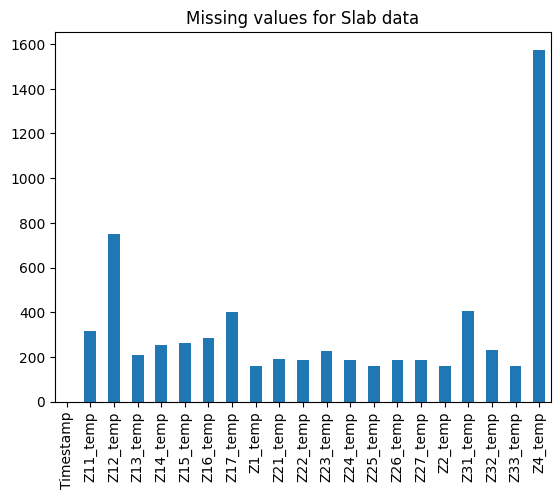

In [16]:
slab_data.isna().sum().plot(kind="bar", title="Missing values for Slab data")
plt.savefig('./missing_slab_data.png')